# Demos for Lecture 4


In [133]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import entropy

import pandas as pd
import word2vec

## KL-Divergence

In [178]:
p = [0.5, 0.5]
q = [0.2, 0.8]
r = [0.4, 0.6]

print(entropy(p,q))
print(entropy(q,r))
print(entropy(r,p))
print(entropy(p,r))

0.22314355131420976
0.09151622184943578
0.020135513550688863
0.020410997260127586


## Cosine similarity

In [174]:
word2vec.word2phrase('./data/oliver_twist.txt','./data/oliver_twist_phrases',verbose=True)
word2vec.word2vec('./data/oliver_twist_phrases', './data/oliver_twist_model.bin', size=200, iter_=10, binary=True, verbose=True)
model = word2vec.load('./data/oliver_twist_model.bin')

Running command: word2phrase -train ./data/oliver_twist.txt -output ./data/oliver_twist_phrases -min-count 5 -threshold 100 -debug 2
Starting training using file ./data/oliver_twist.txt
Words processed: 100K     Vocab size: 77K  
Vocab size (unigrams + bigrams): 60511
Words in train file: 161090
Running command: word2vec -train ./data/oliver_twist_phrases -output ./data/oliver_twist_model.bin -size 200 -window 5 -sample 1e-3 -hs 0 -negative 5 -threads 12 -iter 10 -min-count 5 -alpha 0.025 -debug 2 -binary 1 -cbow 1
Starting training using file ./data/oliver_twist_phrases
Vocab size: 3582
Words in train file: 152774
Alpha: 0.000390  Progress: 99.63%  Words/thread/sec: 213.15k  

In [176]:
model.distance('hand','feet','hill','head')

[('hand', 'feet', 0.9243446189735337),
 ('hand', 'hill', 0.8962490907155184),
 ('hand', 'head', 0.9784266352727251),
 ('feet', 'hill', 0.9901562311256618),
 ('feet', 'head', 0.909988295598704),
 ('hill', 'head', 0.8670625580170362)]

In [173]:
?word2vec.word2vec


## Regression

Here we generate our demo synthetic data.

In [35]:
X = np.random.rand(200000,500)
X[:,499] = np.repeat(1,200000)
beta = np.random.rand(500,1)
y = np.matmul(X,beta).reshape(200000) + np.random.normal(0.0,0.1,200000)

This is the ordinary linear regression:

In [43]:
model1 = LinearRegression()
model1.fit(X,y)

np.linalg.norm(np.append(model1.coef_,[model1.intercept_])- beta)

206.0683211372369

This is the ridge regression model.

In [44]:
model2 = Ridge()
model2.fit(X,y)

np.linalg.norm(np.append(model2.coef_,[model2.intercept_])- beta)

206.0643774184312

This is lasso regression model.

In [45]:
model3 = Lasso()
model3.fit(X,y)

np.linalg.norm(np.append(model3.coef_,[model3.intercept_])- beta)

2899.918094429287

And finally elastic net model.

In [49]:
model4 = ElasticNet()
model4.fit(X,y)

np.linalg.norm(np.append(model4.coef_,[model4.intercept_])- beta)

2899.918094429287

Now, let us develop a regression model on a real dataset. This dataset is culled from UCI. Here is the [link](https://archive.ics.uci.edu/ml/datasets/Residential+Building+Data+Set)

In [71]:
data = pd.read_excel('./data/Residential-Building-Data-Set.xlsx', header=0)
data

,START YEAR,START QUARTER,COMPLETION YEAR,COMPLETION QUARTER,V-1,V-2,V-3,V-4,V-5,V-6,...,V-22.4,V-23.4,V-24.4,V-25.4,V-26.4,V-27.4,V-28.4,V-29.4,V-9,V-10
0,81,1,85,1,1,3150.0,920.0,598.5,190,1010.84,...,815.50,1755.00,8002.0,60.74,54.26,2978.26,41407.00,601988.1,2200,410
1,84,1,89,4,1,7600.0,1140.0,3040.0,400,963.81,...,1316.30,8364.78,8393.0,90.95,89.79,11379.37,44835.00,929027.1,5000,1000
2,78,1,81,4,1,4800.0,840.0,480.0,100,689.84,...,765.80,1755.00,4930.0,38.70,32.04,1653.06,37933.00,377828.6,1200,170
3,72,2,73,2,1,685.0,202.0,13.7,20,459.54,...,152.25,1442.31,1456.0,9.73,8.34,686.16,8194.00,122031.7,165,30
4,87,1,90,2,1,3000.0,800.0,1230.0,410,631.91,...,2244.10,9231.76,9286.0,136.60,140.20,9821.00,48260.00,1734973.5,5500,700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,83,4,86,1,20,1350.0,350.0,108.0,80,251.37,...,1176.50,8343.60,8382.0,87.27,85.56,10555.47,33626.25,865878.9,1100,150
368,81,2,82,4,20,600.0,150.0,36.0,60,299.55,...,815.50,1755.00,8013.0,62.78,56.45,3387.72,10646.75,606524.2,740,80
369,84,4,86,3,20,1900.0,430.0,285.0,150,364.41,...,1584.30,8776.71,8799.0,101.00,101.89,13571.80,34474.50,1067772.0,860,220
370,82,3,84,4,20,510.0,160.0,30.6,60,245.28,...,909.20,7930.66,8004.0,73.57,69.26,4756.68,21855.00,669640.3,1100,110


Columns 6 to 107 are independent variables, and columns 108 and 109 are the dependent variables.

In [72]:
X = data.iloc[:,5:107]
y = data.iloc[:,108]

We will develop a linear regression and a ridge regression models below. `1.0 - model.score` gives us the value of the cost function on these models.

In [75]:
model = LinearRegression()
model.fit(X,y)
1.0 - model.score(X,y)

0.017899630500838648

In [76]:
model = Ridge()
model.fit(X,y)
1.0 - model.score(X,y)

0.017900290230223992

## k-means

For this part of the notes we are using [this](https://archive.ics.uci.edu/ml/datasets/Travel+Reviews) dataset.

In [94]:
data = pd.read_csv('./data/tripadvisor_review.csv')
X = data.iloc[:,1:10]

In [123]:
model = KMeans(n_clusters=3)
model.fit(X)
classes = model.predict(X)
project = PCA(n_components=2)
Z = project.fit_transform(X)

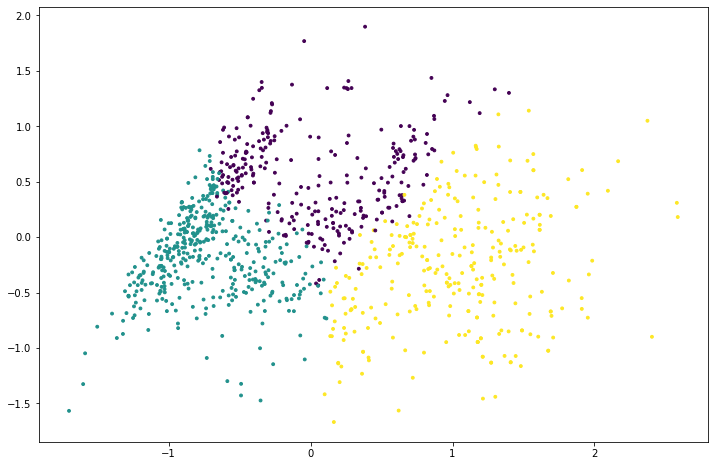

In [180]:
plt.figure(figsize=(12,8))
plt.scatter(Z[:,0],Z[:,1],c=classes,s=8.0)